# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1011]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1012]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [1013]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1014]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1015]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_data['Mouse ID'].nunique()
clean_num_mice

249

## Summary Statistics

In [1016]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

stats_df = summary_stats.rename(columns={'mean': 'Mean Tumor Volume',
                                         'median': 'Median Tumor Volume',
                                         'var': 'Tumor Volume Variance',
                                         'std': 'Tumor Volume Std. Dev.',
                                         'sem': 'Tumor Volume Std. Error'})

print(stats_df)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

## Bar and Pie Charts

In [1017]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Count the number of mice per Drug Regimen
mice_by_drug = clean_data['Drug Regimen'].value_counts()
mice_by_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

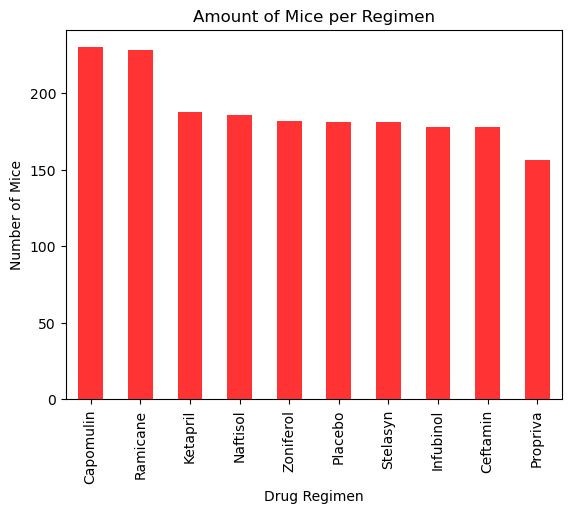

In [1018]:
# Make bar graph along with titles and labels
mice_by_drug.plot.bar(color='red',alpha=0.8)
plt.title('Amount of Mice per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

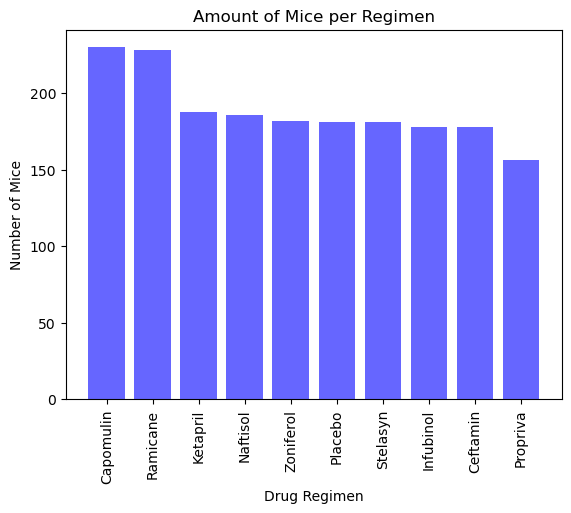

In [1019]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create axes and extract indexes
x_axis = mice_by_drug.index.values
y_axis = mice_by_drug.values

# Create bar graph along with titls and labels 
plt.bar(x_axis,y_axis,color='blue',alpha=0.6)
plt.title('Amount of Mice per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Female vs. Male Mice')

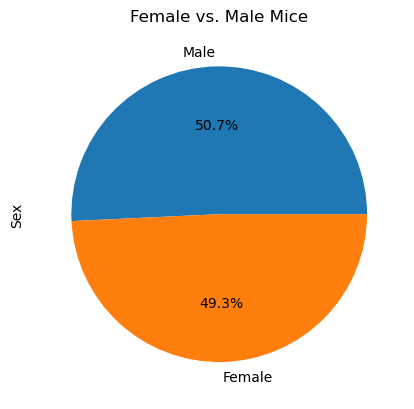

In [1020]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data['Sex'].value_counts()
gender_data.plot.pie(autopct= '%1.1f%%')
plt.title('Female vs. Male Mice')


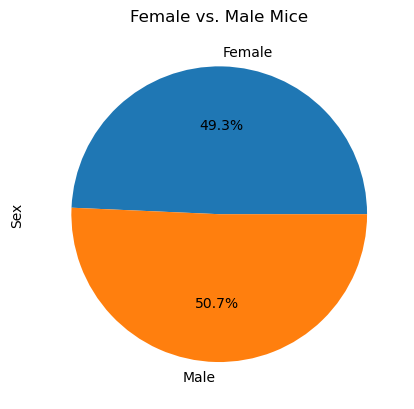

In [1021]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
proportions = [49.3,50.7]
labels = ['Female','Male']

plt.pie(proportions,labels=labels,autopct='%1.1f%%')
plt.title('Female vs. Male Mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [1022]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
# Making a list and a dataframe based off of it
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_data = combined_data[combined_data['Drug Regimen'].isin(drug_list)]
drug_data.head()

# Start by getting the last (greatest) timepoint for each mouse
# Locate the rows which contain mice on each drug and get the tumor volumes
last_timepoint = drug_data.groupby(['Drug Regimen','Mouse ID']).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [1023]:
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

empty_list = []

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    UQ = quartiles[.75].round(2)
    LQ = quartiles[.25].round(2)
    IQR = round(UQ-LQ,round(2))
    upper_bound = round(UQ + (1.5*IQR),2)
    lower_bound = round(LQ - (1.5*IQR),2)

for drug in drug_list:
    empty_list.append(list(last_timepoint[drug].dropna()))

    
print(empty_list)

    

[[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384], [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575], [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141], [62.99935619, 45.0, 56.05

<function matplotlib.pyplot.show(close=None, block=None)>

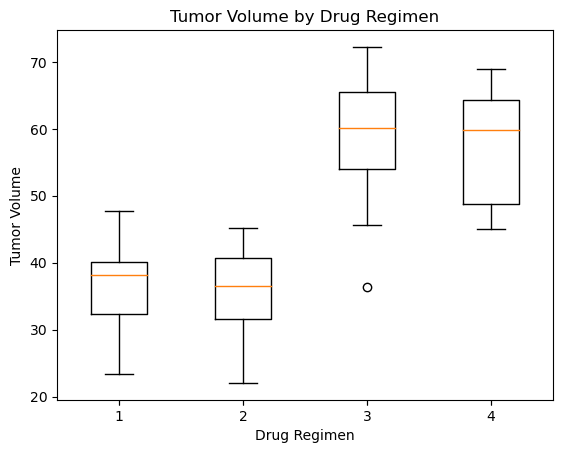

In [1024]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4],drug_list)
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume by Drug Regimen',)
plt.boxplot(empty_list)
plt.show


## Line and Scatter Plots

In [1025]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# First, creating a Dataframe with only Capomulin rows
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [1026]:
specific_mouse = capomulin_df.loc[capomulin_df['Mouse ID']=='s185']
specific_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


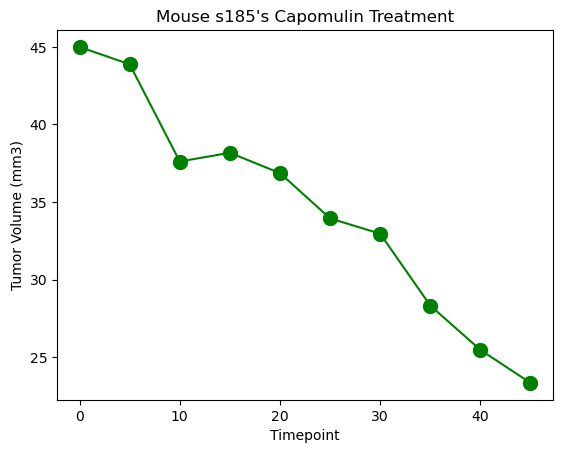

In [1027]:
x_axis = specific_mouse['Timepoint']
tumor_size = specific_mouse['Tumor Volume (mm3)']

plt.title("Mouse s185's Capomulin Treatment")
plt.plot(x_axis,tumor_size,markersize=10,marker='o',color='green')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0.5, 1.0, 'Mouse Weight Versus Average Tumor Volume')

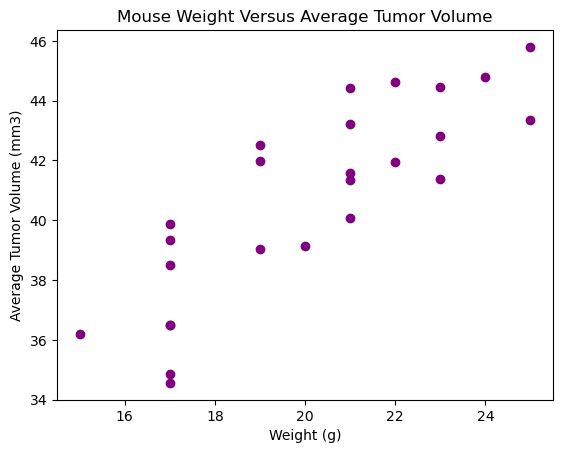

In [1028]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_vol = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'], color="purple")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Vs. Average Tumor Volume')

